In [7]:
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# encoders
from sklearn.preprocessing import LabelEncoder


In [8]:
# Load data
train = pd.read_csv("../input/30-days-of-ml/train.csv", index_col=0)
train

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,B,B,B,C,B,B,A,E,C,N,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
2,B,B,A,A,B,D,A,F,A,O,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
3,A,A,A,C,B,D,A,D,A,F,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
4,B,B,A,C,B,D,A,E,C,K,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
6,A,A,A,C,B,D,A,E,A,N,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,B,B,A,A,B,D,A,E,A,I,...,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404,7.945605
499996,A,B,A,C,B,B,A,E,E,F,...,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611,7.326118
499997,B,B,A,C,B,C,A,E,G,F,...,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732,8.706755


In [9]:
# check for missing data and data-types
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300000 entries, 1 to 499999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   cat0    300000 non-null  object 
 1   cat1    300000 non-null  object 
 2   cat2    300000 non-null  object 
 3   cat3    300000 non-null  object 
 4   cat4    300000 non-null  object 
 5   cat5    300000 non-null  object 
 6   cat6    300000 non-null  object 
 7   cat7    300000 non-null  object 
 8   cat8    300000 non-null  object 
 9   cat9    300000 non-null  object 
 10  cont0   300000 non-null  float64
 11  cont1   300000 non-null  float64
 12  cont2   300000 non-null  float64
 13  cont3   300000 non-null  float64
 14  cont4   300000 non-null  float64
 15  cont5   300000 non-null  float64
 16  cont6   300000 non-null  float64
 17  cont7   300000 non-null  float64
 18  cont8   300000 non-null  float64
 19  cont9   300000 non-null  float64
 20  cont10  300000 non-null  float64
 21  cont11  30

No missing values found so no need for imputation.

In [10]:
# check descriptive statistics
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cat0,300000,2,A,193130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat1,300000,2,A,154824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat2,300000,2,A,253886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat3,300000,4,C,263356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat4,300000,4,B,294737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat5,300000,4,B,149340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat6,300000,8,A,290511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat7,300000,8,E,276040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat8,300000,7,C,111103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cat9,300000,15,F,71249,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Numerical columns contain negative values, may need to take into consideration.

Target seems to be skewed or has outliers: majority of entries is spread around 8 but there are some values around 0 and 10.


Will check distribution later.

In [11]:
# split categorical and numeric columns
categoricals = train.select_dtypes(include='object')
cat_cols = list(categoricals.columns)
numericals = train.select_dtypes(exclude='object')
target = numericals.pop('target')
num_cols = list(numericals.columns)

enc = LabelEncoder()
categoricals_encoded = pd.DataFrame(categoricals.apply(lambda x: enc.fit_transform(x)), columns=categoricals.columns, index=categoricals.index)

df_encoded = pd.concat([categoricals_encoded, numericals, target], axis=1)

print(cat_cols)
print(num_cols)

['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']


## Check correlation

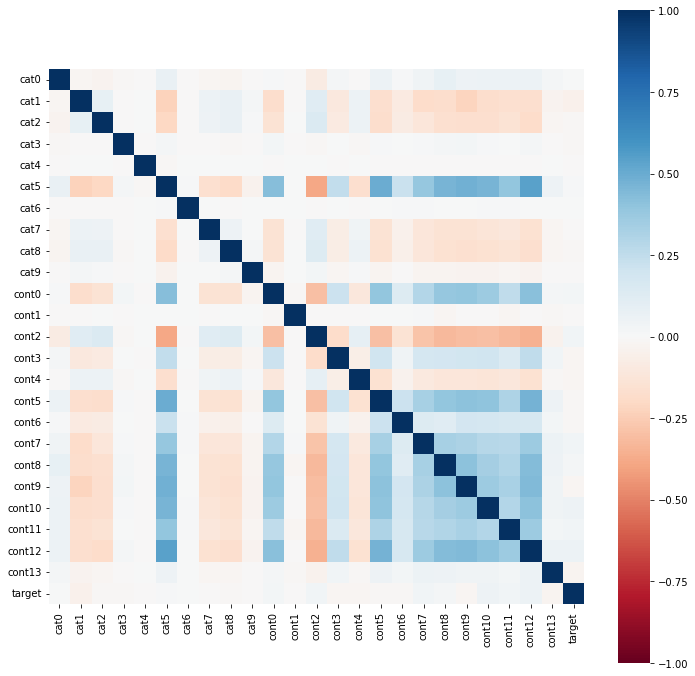

In [12]:
plt.figure(figsize = (12,12))
sns.heatmap(
    df_encoded.corr(), 
    square=True, 
    cmap="RdBu", 
    vmin=-1, 
    vmax=1,
    center=0  # neutral color corresponds to number 0
)
plt.show()

## Check distribution of numerical columns

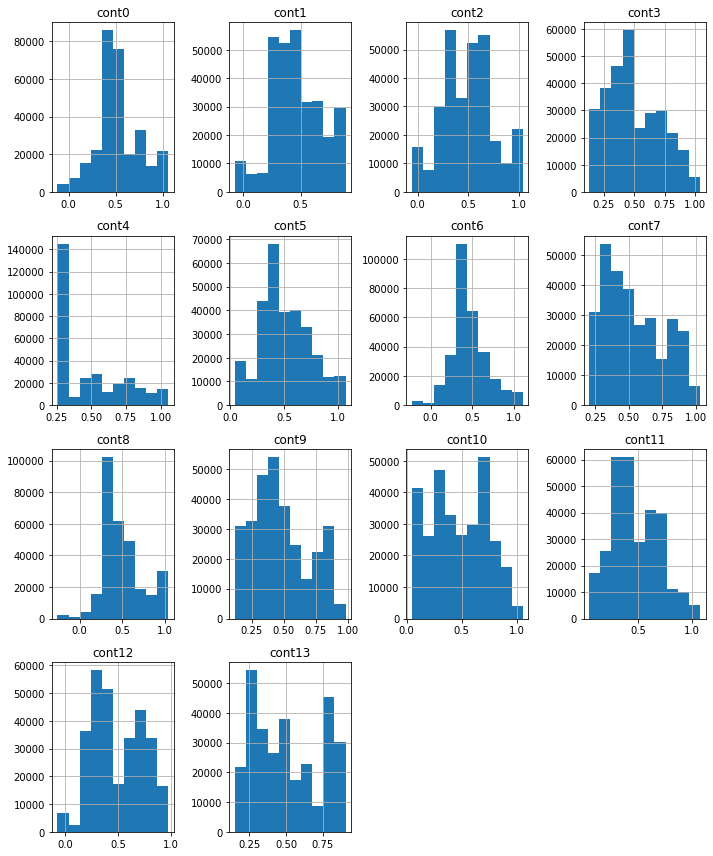

In [13]:
numericals.hist(figsize=(10,12))
plt.tight_layout()
plt.show()

Some of the columns seems to have gaussian-like distribution but others are skewed or have outliers. --> may need power transformations to have more gaussian distribution.

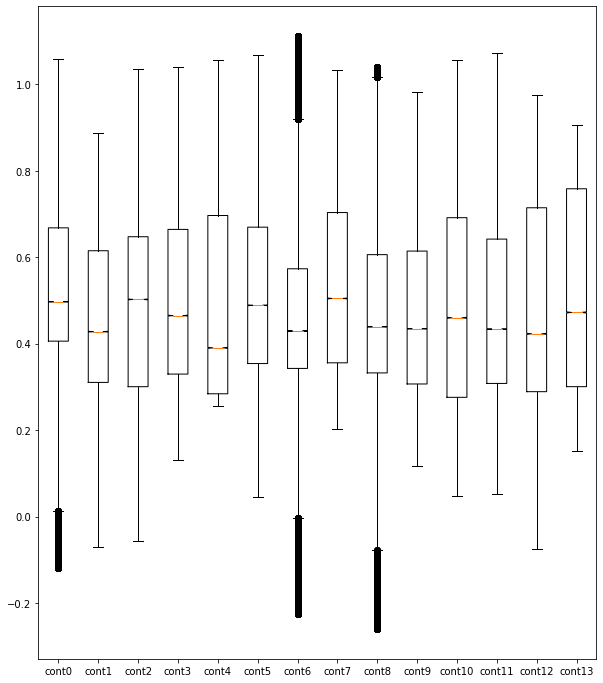

In [14]:
plt.figure(figsize=(10, 12))
plt.boxplot(numericals,
    labels=numericals.columns,
    notch=True    
)
plt.show()

Boxplot also shows outliers and skewed columns.

## Check target distribution

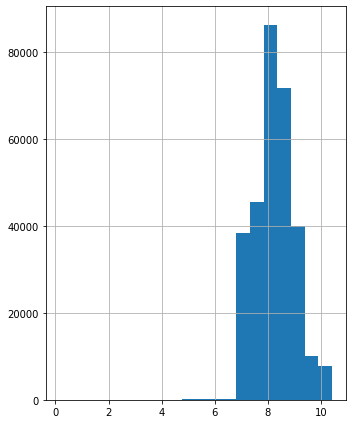

In [15]:
target.hist(figsize=(5,6), bins=20)
plt.tight_layout()
plt.show()

Target distribution is gaussian-like with a mean around 8. Somewhat skewed with right tail. Values around 0 does not show here (their count may be insignificant.)

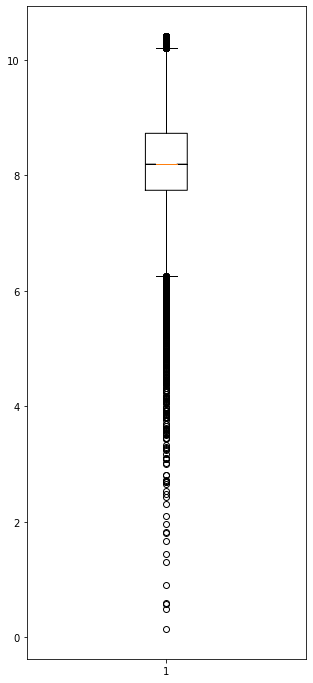

In [20]:
plt.figure(figsize=(5, 12))
plt.boxplot(target,
    notch=True    
)
plt.show()

Bosxplot shows outliers around 10 and below 6.

## Check categorical columns

<Figure size 3000x1200 with 0 Axes>

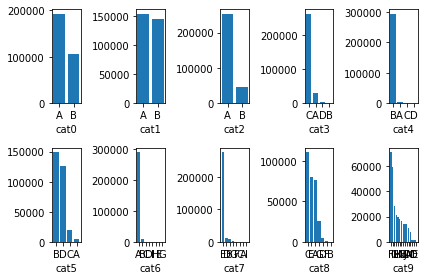

In [ ]:
plt.figure(figsize=(25, 10), dpi=120.0)

fig, axes = plt.subplots(2, 5)
axes = axes.ravel()
 
for i, col in enumerate(categoricals.columns):
    plt.subplot(2, 5, i+1)
    plt.bar(
        x=categoricals.loc[:, col].value_counts().index,
        height=categoricals.loc[:, col].value_counts()
    )
    plt.xlabel(col)

plt.tight_layout()
plt.show()

The distribution of values within categorical columns is generally extremely imbalanced. Therefore some of the categories may be unimportant. Feature importances may confirm.

# Feature importances
without one-hot encoding

## Permutation importance

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE

X = df_encoded.drop(['target'], axis=1)
y = df_encoded['target']

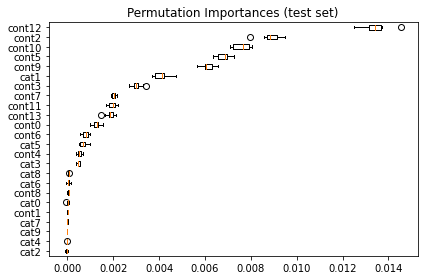

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
model = LinearRegression()
model.fit(X_train, y_train)

result = permutation_importance(
    estimator=model, 
    X=X_test, 
    y=y_test, 
    n_repeats=10, 
    random_state=123
)

imp_vals = result['importances_mean']
 
varimp_df = pd.DataFrame({'feature': X.columns, 'importance': imp_vals})

sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

## Principal Component Analysis

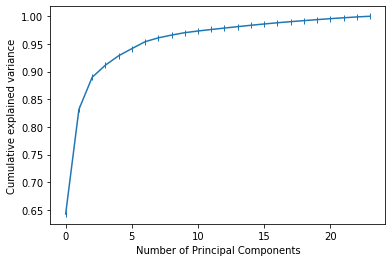

In [ ]:
pca = PCA().fit(X)
 
# plot the cumulative variance explained by all the principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='|')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance')
plt.show()

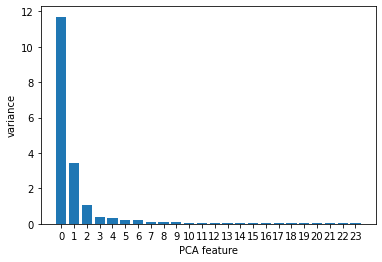

In [ ]:
# plot individual variances (scree plot)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

## Forward Feature Selection (K-Best)

In [ ]:
s = df_encoded.sample(10000, random_state=123)
X_s = s.drop(['target'], axis=1)
y_s = s['target']

feats = SelectKBest(k=10)
fit = feats.fit(X_s, y_s)
mask = fit.get_support()
print(mask)
X_s.loc[:, mask].columns

[False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True]


C:\Users\Judit\.virtualenvs\Kaggle-axgtS9bO\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


Index(['cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10',
       'cont11', 'cont12', 'cont13'],
      dtype='object')

## Recursive Feature Elimination

In [ ]:
model = LinearRegression()
rfe = RFE(
    estimator=model, 
    n_features_to_select=10,   # keep 10 features
    step=1,                    # on each iteration the 1 least important features are dropped
    verbose=1
)

# Fit the RFE for selecting the top 250 features
rfe = rfe.fit(X, y)
# # Get the indexes of the features used
# rfe.get_support(indices = True)
# rfe.support_
# names of features used
print(X.columns[rfe.support_])
# print ranking of features
d = dict(zip(X.columns, rfe.ranking_))
print(sorted(d.items(), key=lambda x: x[1]))

Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Index(['cont0', 'cont2', 'cont3', 'cont5', 'cont7', 'cont9', 'cont10',
       'cont11', 'cont12', 'cont13'],
      dtype='object')
[('cont0', 1), ('cont2', 1), ('cont3', 1), ('cont5', 1), ('cont7', 1), ('cont9', 1), ('cont10', 1), ('cont11', 1), ('cont12', 1), ('cont13', 1), ('cont6', 2), ('cat1', 3), ('cont4', 4), ('cat3', 5), ('cat6', 6), ('cont8', 7), ('cat5', 8), ('cat0', 9), ('cat2', 10), ('cont1', 11), ('cat4', 12), ('cat8', 13), ('cat7', 14), ('cat9', 15)]


# Feature importances
with one-hot encoded categoricals

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
cat_oh = pd.DataFrame(enc.fit_transform(categoricals), index=categoricals.index, columns=enc.get_feature_names(categoricals.columns))
X_oh = pd.concat([numericals, cat_oh], axis=1)
X_oh

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
id,,,,,,,,,,,,,,,,,,,,,
1,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499993,0.697124,0.483452,0.297770,0.195821,0.307883,0.769792,0.450538,0.934360,1.005077,0.853726,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
499996,0.446200,0.715135,0.610931,0.601730,0.736713,0.528056,0.508502,0.358247,0.257825,0.433525,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499997,0.544279,0.060937,0.590955,0.905308,0.277074,0.688747,0.372425,0.364936,0.383224,0.551825,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Permutation importance

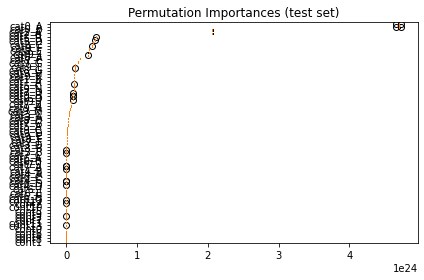

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_oh, y, test_size=0.3, random_state=123)
model = LinearRegression()
model.fit(X_train, y_train)

result = permutation_importance(
    estimator=model, 
    X=X_test, 
    y=y_test, 
    n_repeats=10, 
    random_state=123
)

imp_vals = result['importances_mean']
 
varimp_df = pd.DataFrame({'feature': X_oh.columns, 'importance': imp_vals})

sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

## PCA

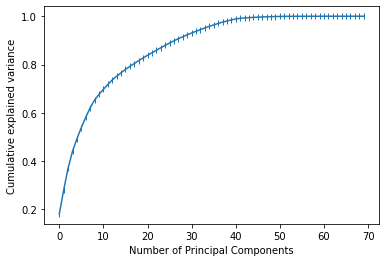

In [ ]:
pca = PCA().fit(X_oh)
 
# plot the cumulative variance explained by all the principal components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='|')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance')
plt.show()

## Recursive Feature Elimination

In [ ]:
model = LinearRegression()
rfe = RFE(
    estimator=model, 
    n_features_to_select=35,   # keep 35 features
    step=5,                    # on each iteration the 5 least important features are dropped
    verbose=1
)

# Fit the RFE for selecting the top 250 features
rfe = rfe.fit(X_oh, y)
# # Get the indexes of the features used
# rfe.get_support(indices = True)
# rfe.support_
# names of features used
print(X_oh.columns[rfe.support_])
# print ranking of features
d = dict(zip(X_oh.columns, rfe.ranking_))
print(sorted(d.items(), key=lambda x: x[1]))

Fitting estimator with 70 features.
Fitting estimator with 65 features.
Fitting estimator with 60 features.
Fitting estimator with 55 features.
Fitting estimator with 50 features.
Fitting estimator with 45 features.
Fitting estimator with 40 features.
Index(['cat3_A', 'cat3_B', 'cat3_C', 'cat3_D', 'cat4_A', 'cat4_B', 'cat4_C',
       'cat4_D', 'cat5_A', 'cat5_B', 'cat5_C', 'cat5_D', 'cat6_A', 'cat6_B',
       'cat6_C', 'cat6_D', 'cat6_E', 'cat6_G', 'cat6_H', 'cat6_I', 'cat9_A',
       'cat9_B', 'cat9_C', 'cat9_D', 'cat9_E', 'cat9_F', 'cat9_G', 'cat9_H',
       'cat9_I', 'cat9_J', 'cat9_K', 'cat9_L', 'cat9_M', 'cat9_N', 'cat9_O'],
      dtype='object')
[('cat3_A', 1), ('cat3_B', 1), ('cat3_C', 1), ('cat3_D', 1), ('cat4_A', 1), ('cat4_B', 1), ('cat4_C', 1), ('cat4_D', 1), ('cat5_A', 1), ('cat5_B', 1), ('cat5_C', 1), ('cat5_D', 1), ('cat6_A', 1), ('cat6_B', 1), ('cat6_C', 1), ('cat6_D', 1), ('cat6_E', 1), ('cat6_G', 1), ('cat6_H', 1), ('cat6_I', 1), ('cat9_A', 1), ('cat9_B', 1), ('cat9_C'